<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C5/mini_taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Taller 2
**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

## Sección 1

Cargue los datos correspondientes a la evolución de  los contagios por COVID-19 en nuestro país (archivo casos_diarios_covid.csv) ubicado en la ruta de este notebok.

Usted deberá reproducir el siguiente gráfico. Para ello, investigue cómo añadir elementos como: Nombre de los ejes, título y leyendas.
Adicionalmente, deberá tener en consideración los siguiente:


1. Deberá crear una nueva columna llamada `fecha` que contenga a la fecha en formato Date (puede utilizar la función `as.Date()`) en formato `yyyy-mm-dd`.
* Note que en el segundo gráfico, en el eje de las abcisas se muestran las fechas cada 14 días. Investigue el `comando scale_x_date` para modificar dicho parámetro.

Para mayor información sobre las distintas opciones gráficas de ggplot puede consultar la siguiente referencia:
https://ggplot2.tidyverse.org/index.html


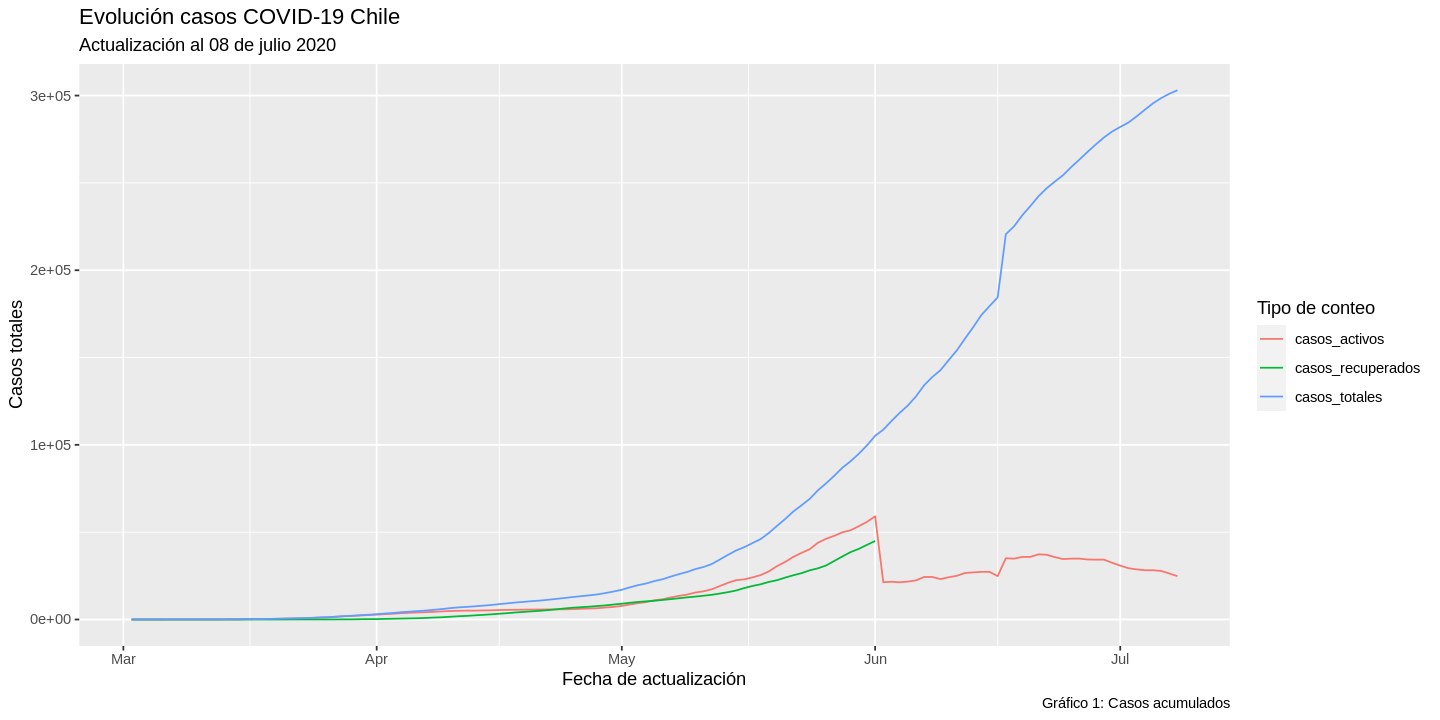



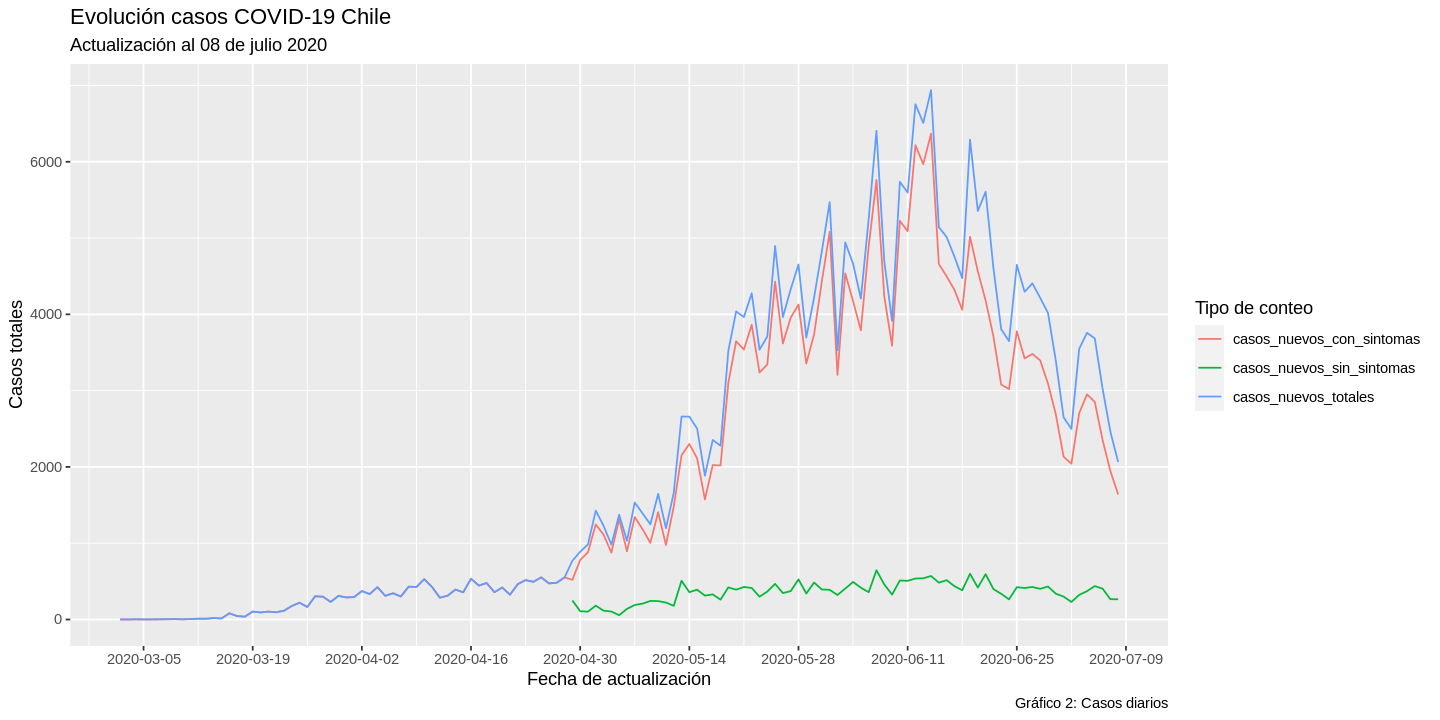




## Sección 2
En esta sección seguiremos explorando los vuelos desde los aeropuertos de NY durante el 2013. En esta ocasión cargaremos los datasets desde el package _nycflights13_.

Para mayor informacíón sobre los datasets disponibles en este package  refiérase al iguiente link
** https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf **



In [ ]:
data("flights", package = "nycflights13")
data("weather", package = "nycflights13")
vuelos <- flights
clima <- weather

In [ ]:
library(dplyr)
library(ggplot2)

## P1. Resumen retrasos
Genere un resumen de la variable dep_delay del dataset _flights_.

## P2. Retrasos por aeropuerto
¿Cuál es el tiempo promedio de retraso de  llegada por cada aeropuerto de origen?

## P3. Tratamiento  NA's
Elimine los registros donde *dep_delay* es NA  y también elimine los registros donde *arr_delay* es NA.

## P4. Vuelos con retrasos
**a)** Genere un nuevo dataset llamado **vuelos_ret** que contenga todos los registros que tuvieron un  **retraso de salida**. Tenga en cuenta que ya debió tratar los NA's de la pregunta anterior y por ende están considerados en esta etapa.

**b)** Considerando el dataset anterior, ¿cuál es el retraso promedio de salida por aeropuerto de origen?

## P5. Retrasos por dia
Genere un campo fecha en formato Date (puede utilizar la función as.Date()) que contenga la fecha del vuelo en formato "yyyy-mm-dd".

**a)** Una vez generado este nuevo campo, genere un gráfico que permita visualizar el retraso **promedio** de salida (*dep_delay*), por cada día. Por ejemplo, un gráfico de líneas.

**b)** Considerando el gráfico anterior, añada una curva de tendencia y determine (visualmente) si exsten meses con un alza notoria en relación a los retrasos de los vuelos.


## P6. Cruce con clima
Se tiene la hipótesis de que el clima puede ser un factor importante en los retrasos, para ello cargue el dataset llamado "weather" del package "nycflights13"

**a)** Genere un dataset llamado *vuelos_ret_ampliado* que incluya tanto la información de los vuelos como del clima. (el match debe hacerse por "year","month","day","origin","time_hour").

## P7. Retrasos 15 min

Cree una columna de **tipo int** llamada *arr_delay_alto*, que tome el valor 1 si el retraso de llegada es mayor o igual a 15 min y 0 en caso contrario. De ahora en adelante diremos que esta columna indica si existió un _retraso alto_ o no.

## P8. Clima según retraso alto (4P)
    
**a)** ¿Cuál es la visibilidad (visib) promedio por tipo de retraso (alto y no alto)?

**b)** ¿Cuál es el valor de la precipitacion (precip) media por tipo de retraso (alto y no alto)?

**c)** ¿Cuál es el valor promedio de wind_gust (vientos fuertes)  por tipo de retraso?

**d)** ¿Qué se observa a partir del resumen anterior?

 ## P9. Tasa de retrasos (2P)
**a)** ¿Cuál es el aeropuerto de destino con mayor tasa de retrasos altos (arr_delay_alto) ?

**b)** ¿Cuál es el mes con mayor tasa de retrasos altos?

# Respuestas

In [ ]:
# P1
summary(vuelos$dep_delay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -43.00   -5.00   -2.00   12.64   11.00 1301.00    8255 

In [ ]:
# P2
vuelos %>%
    group_by(origin) %>%
    summarise(m_arr_del = mean(arr_delay,na.rm=T))

origin,m_arr_del
<chr>,<dbl>
EWR,9.107055
JFK,5.551481
LGA,5.783488


In [ ]:
# P3
vuelos %>%
    filter(!is.na(dep_delay) & !is.na(arr_delay) )

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [ ]:
# P4
# a)
  vuelos_ret <- filter(vuelos,!is.na(arr_delay) & !is.na(dep_delay)  & dep_delay > 0 )

In [ ]:
# P4
# b)
vuelos_ret %>%
    group_by(origin) %>%
    summarise(m_dep_del = mean(dep_delay,na.rm=T))

origin,m_dep_del
<chr>,<dbl>
EWR,38.83913
JFK,37.88509
LGA,41.54964


In [ ]:
# P5
vuelos_ret <- vuelos_ret %>%
mutate(fecha = paste(year,
                      ifelse(nchar(month) == 1
                             ,paste0("0",month)
                             ,month)
                      ,ifelse(nchar(day) == 1
                              ,paste0("0",day)
                              ,day)
                     , sep = "-"
                     )
      ) %>%
mutate(fecha = as.Date(fecha))

#**a)** Una vez generado este nuevo campo, genere un gráfico que permita visualizar el retraso **promedio** de salida (*dep_delay*), por cada día. Por ejemplo, un gráfico de líneas.

#**b)** Considerando el gráfico anterior, añada una curva de tendencia y determine (visualmente) si exsten meses con un alza notoria en relación a los retrasos de los vuelos.




In [ ]:
options(repr.plot.width=12, repr.plot.height=4)


vuelos_ret %>%
    group_by(fecha) %>%
    summarise(mean_dep_delay = mean(dep_delay,na.rm = T)) %>%
    ggplot() +
    aes(x = fecha, y = mean_dep_delay) +
    geom_line() +
    geom_smooth()



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


In [ ]:
# P6

vuelos_ret_ampliado <-  vuelos_ret %>%
                            left_join(clima, by=c("year","month","day","origin", "time_hour") )



In [ ]:
# P7
vuelos_ret_ampliado <- vuelos_ret_ampliado %>%
    mutate(arr_delay_alto = as.integer(ifelse(arr_delay >= 15, 1, 0)))

In [ ]:
# P8
# a)

vuelos_ret_ampliado %>%
    group_by(arr_delay_alto) %>%
    summarise(visib_prom = mean(visib,na.rm=T))

arr_delay_alto,visib_prom
<int>,<dbl>
0,9.393372
1,8.871484


In [ ]:
# P8
# b)
vuelos_ret_ampliado %>%
    group_by(arr_delay_alto) %>%
    summarise(precip_prom = mean(precip,na.rm=T))

arr_delay_alto,precip_prom
<int>,<dbl>
0,0.003758758
1,0.009450212


In [ ]:
# P8
# c)
vuelos_ret_ampliado %>%
    group_by(arr_delay_alto) %>%
    summarise(wg_prom = mean(wind_gust,na.rm=T))

arr_delay_alto,wg_prom
<int>,<dbl>
0,25.01698
1,25.67248


In [ ]:
# P8
# d)
# - A menor visibilidad mayor retraseo.
# - A mayor precipitaciones, mayor retraso.

In [ ]:
# P9
# a)
#**a)** ¿Cuál es el aeropuerto de destino con mayor tasa de retrasos altos (arr_delay_alto) ?

# El aeropuerto de destino CAE es el que posee la mayor tasa de retrasos altos.
vuelos_ret_ampliado %>%
    group_by(dest) %>%
    summarise(tasa_ret_altos = mean(arr_delay_alto,na.rm=T)) %>%
    arrange(desc(tasa_ret_altos))

In [ ]:
# P9

#**b)** ¿Cuál es el mes con mayor tasa de retrasos altos?
# b)
vuelos_ret_ampliado %>%
    group_by(year,month,day) %>%
    summarise(tasa_ret_altos = mean(dep_delay_alto,na.rm=T)) %>%
    arrange(desc(tasa_ret_altos)) %>%
    head()